In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil import parser
from PIL import Image
from scipy.interpolate import CubicSpline
import csv
import os
from scipy.signal import find_peaks
from matplotlib import rcParams

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
header_lines = 6

df = pd.read_csv('/content/drive/MyDrive/TAMUCC-SEU NASA Pandora-AERONET Project/SEU AERONET/Data/20200101_20230501_Gobabeb/20200101_20230501_Gobabeb.siz', skiprows=header_lines)

# Remove leading whitespace from column names
df.columns = df.columns.str.lstrip()

df.head(10)

# Print the file name and column names
#for i in range(len(df.columns)):
#    print(df.columns[i])

,Site,Date(dd:mm:yyyy),Time(hh:mm:ss),Day_of_Year,Day_of_Year(Fraction),0.050000,0.065604,0.086077,0.112939,0.148184,...,If_Retrieval_is_L2(without_L2_0.4_AOD_440_threshold),If_AOD_is_L2,Last_Processing_Date(dd:mm:yyyy),Last_Processing_Time(hh:mm:ss),Instrument_Number,Latitude(Degrees),Longitude(Degrees),Elevation(m),Inversion_Data_Quality_Level,Retrieval_Measurement_Scan_Type
0,Gobabeb,01:01:2020,14:15:18,1,1.593958,0.000091,0.000270,0.000646,0.001242,0.001910,...,0,1,07:06:2021,22:31:16,1123,-23.561619,15.041058,405.0,lev15,Almucantar
1,Gobabeb,01:01:2020,15:12:01,1,1.633345,0.000153,0.000383,0.000776,0.001283,0.001769,...,0,1,07:06:2021,22:34:32,1123,-23.561619,15.041058,405.0,lev15,Almucantar
2,Gobabeb,01:01:2020,15:38:54,1,1.652014,0.000163,0.000470,0.000998,0.001583,0.001960,...,0,1,07:06:2021,22:37:36,1123,-23.561619,15.041058,405.0,lev15,Almucantar
3,Gobabeb,01:01:2020,16:19:01,1,1.679873,0.000129,0.000420,0.000990,0.001706,0.002235,...,0,1,07:06:2021,22:39:00,1123,-23.561619,15.041058,405.0,lev15,Almucantar
4,Gobabeb,01:01:2020,16:40:01,1,1.694456,0.000138,0.000540,0.001373,0.002305,0.002709,...,0,1,07:06:2021,22:40:31,1123,-23.561619,15.041058,405.0,lev15,Almucantar
5,Gobabeb,02:01:2020,14:15:40,2,2.594213,0.000083,0.000220,0.000476,0.000843,0.001242,...,0,1,07:06:2021,22:42:05,1123,-23.561619,15.041058,405.0,lev15,Almucantar
6,Gobabeb,02:01:2020,15:12:31,2,2.633692,0.000150,0.000505,0.001146,0.001795,0.002077,...,0,1,07:06:2021,22:45:36,1123,-23.561619,15.041058,405.0,lev15,Almucantar
7,Gobabeb,02:01:2020,16:19:29,2,2.680197,0.000171,0.000329,0.000567,0.000877,0.001231,...,0,1,07:06:2021,22:49:53,1123,-23.561619,15.041058,405.0,lev15,Almucantar
8,Gobabeb,02:01:2020,16:40:21,2,2.694688,0.000288,0.000942,0.001942,0.002611,0.002529,...,0,1,07:06:2021,22:33:19,1123,-23.561619,15.041058,405.0,lev15,Almucantar
9,Gobabeb,03:01:2020,07:19:11,3,3.304988,0.000169,0.000365,0.000702,0.001198,0.001826,...,1,1,07:06:2021,22:37:11,1123,-23.561619,15.041058,405.0,lev15,Almucantar


In [ ]:
#df = df.iloc[5:].reset_index(drop=True)
df.head(100)

,Site,Date(dd:mm:yyyy),Time(hh:mm:ss),Day_of_Year,Day_of_Year(Fraction),0.050000,0.065604,0.086077,0.112939,0.148184,...,If_Retrieval_is_L2(without_L2_0.4_AOD_440_threshold),If_AOD_is_L2,Last_Processing_Date(dd:mm:yyyy),Last_Processing_Time(hh:mm:ss),Instrument_Number,Latitude(Degrees),Longitude(Degrees),Elevation(m),Inversion_Data_Quality_Level,Retrieval_Measurement_Scan_Type
0,Gobabeb,01:01:2020,14:15:18,1,1.593958,0.000091,0.000270,0.000646,0.001242,0.001910,...,0,1,07:06:2021,22:31:16,1123,-23.561619,15.041058,405.0,lev15,Almucantar
1,Gobabeb,01:01:2020,15:12:01,1,1.633345,0.000153,0.000383,0.000776,0.001283,0.001769,...,0,1,07:06:2021,22:34:32,1123,-23.561619,15.041058,405.0,lev15,Almucantar
2,Gobabeb,01:01:2020,15:38:54,1,1.652014,0.000163,0.000470,0.000998,0.001583,0.001960,...,0,1,07:06:2021,22:37:36,1123,-23.561619,15.041058,405.0,lev15,Almucantar
3,Gobabeb,01:01:2020,16:19:01,1,1.679873,0.000129,0.000420,0.000990,0.001706,0.002235,...,0,1,07:06:2021,22:39:00,1123,-23.561619,15.041058,405.0,lev15,Almucantar
4,Gobabeb,01:01:2020,16:40:01,1,1.694456,0.000138,0.000540,0.001373,0.002305,0.002709,...,0,1,07:06:2021,22:40:31,1123,-23.561619,15.041058,405.0,lev15,Almucantar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Gobabeb,20:01:2020,16:47:39,20,20.699757,0.000088,0.000552,0.001905,0.003587,0.003802,...,1,1,07:06:2021,22:48:38,1123,-23.561619,15.041058,405.0,lev15,Almucantar
96,Gobabeb,21:01:2020,07:02:30,21,21.293403,0.000645,0.002473,0.004267,0.003932,0.002851,...,0,1,07:06:2021,22:51:09,1123,-23.561619,15.041058,405.0,lev15,Almucantar
97,Gobabeb,21:01:2020,07:29:48,21,21.312361,0.000234,0.001019,0.002382,0.003247,0.003137,...,0,1,07:06:2021,22:55:33,1123,-23.561619,15.041058,405.0,lev15,Almucantar
98,Gobabeb,22:01:2020,07:03:08,22,22.293843,0.000203,0.000904,0.002474,0.004191,0.004554,...,1,1,07:06:2021,22:47:32,1123,-23.561619,15.041058,405.0,lev15,Almucantar


In [ ]:
#df.columns = df.iloc[0]
#df = df.drop(0).reset_index(drop=True)

df.head(100)

,Site,Date(dd:mm:yyyy),Time(hh:mm:ss),Day_of_Year,Day_of_Year(Fraction),0.050000,0.065604,0.086077,0.112939,0.148184,...,If_Retrieval_is_L2(without_L2_0.4_AOD_440_threshold),If_AOD_is_L2,Last_Processing_Date(dd:mm:yyyy),Last_Processing_Time(hh:mm:ss),Instrument_Number,Latitude(Degrees),Longitude(Degrees),Elevation(m),Inversion_Data_Quality_Level,Retrieval_Measurement_Scan_Type
0,Gobabeb,01:01:2020,14:15:18,1,1.593958,0.000091,0.000270,0.000646,0.001242,0.001910,...,0,1,07:06:2021,22:31:16,1123,-23.561619,15.041058,405.0,lev15,Almucantar
1,Gobabeb,01:01:2020,15:12:01,1,1.633345,0.000153,0.000383,0.000776,0.001283,0.001769,...,0,1,07:06:2021,22:34:32,1123,-23.561619,15.041058,405.0,lev15,Almucantar
2,Gobabeb,01:01:2020,15:38:54,1,1.652014,0.000163,0.000470,0.000998,0.001583,0.001960,...,0,1,07:06:2021,22:37:36,1123,-23.561619,15.041058,405.0,lev15,Almucantar
3,Gobabeb,01:01:2020,16:19:01,1,1.679873,0.000129,0.000420,0.000990,0.001706,0.002235,...,0,1,07:06:2021,22:39:00,1123,-23.561619,15.041058,405.0,lev15,Almucantar
4,Gobabeb,01:01:2020,16:40:01,1,1.694456,0.000138,0.000540,0.001373,0.002305,0.002709,...,0,1,07:06:2021,22:40:31,1123,-23.561619,15.041058,405.0,lev15,Almucantar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Gobabeb,20:01:2020,16:47:39,20,20.699757,0.000088,0.000552,0.001905,0.003587,0.003802,...,1,1,07:06:2021,22:48:38,1123,-23.561619,15.041058,405.0,lev15,Almucantar
96,Gobabeb,21:01:2020,07:02:30,21,21.293403,0.000645,0.002473,0.004267,0.003932,0.002851,...,0,1,07:06:2021,22:51:09,1123,-23.561619,15.041058,405.0,lev15,Almucantar
97,Gobabeb,21:01:2020,07:29:48,21,21.312361,0.000234,0.001019,0.002382,0.003247,0.003137,...,0,1,07:06:2021,22:55:33,1123,-23.561619,15.041058,405.0,lev15,Almucantar
98,Gobabeb,22:01:2020,07:03:08,22,22.293843,0.000203,0.000904,0.002474,0.004191,0.004554,...,1,1,07:06:2021,22:47:32,1123,-23.561619,15.041058,405.0,lev15,Almucantar


In [ ]:
peak_data = []

for i in range(len(df)):

    # Extract the row of data for plotting
    row = df.iloc[i]
    selected_columns = df.columns[5:27]
    row_data = row[selected_columns]

    # Convert the column names (assumed to be radii) to float for plotting
    radii = [float(col) for col in selected_columns]

    # Interpolate using Cubic Spline
    cs = CubicSpline(radii, row_data)
    xs = np.linspace(min(radii), max(radii), 8000)
    ys = cs(xs)

    # Find peaks
    peaks, _ = find_peaks(ys)
    peak_values = xs[peaks]
    peak_heights = ys[peaks]

    # Get the three highest peaks
    sorted_indices = np.argsort(peak_heights)[-3:]
    highest_peaks = peak_values[sorted_indices]
    highest_peak_heights = peak_heights[sorted_indices]

    # Extract Site, Date, and Time
    site = row['Site']
    date = row['Date(dd:mm:yyyy)']
    #print(date)
    time = row['Time(hh:mm:ss)']
    #print(time)
    lat = row['Latitude(Degrees)']
    lon = row['Longitude(Degrees)']
    elevation = row['Elevation(m)']

    # Append peak data to the list
    for peak, height in zip(highest_peaks, highest_peak_heights):
        peak_data.append({
            'Site': site,
            'Date': date,
            'Time': time,
            'Datetime': pd.to_datetime(f'{date} {time}', format='%d:%m:%Y %H:%M:%S'),
            'Radius': peak,
            'Height': height
        })

In [ ]:
print(peak_data)

[{'Site': 'Gobabeb', 'Date': '01:01:2020', 'Time': '14:15:18', 'Datetime': Timestamp('2020-01-01 14:15:18'), 'Radius': 2.077847230903863, 'Height': 0.013611953019175674}, {'Site': 'Gobabeb', 'Date': '01:01:2020', 'Time': '15:12:01', 'Datetime': Timestamp('2020-01-01 15:12:01'), 'Radius': 2.232972871608951, 'Height': 0.014786166467104187}, {'Site': 'Gobabeb', 'Date': '01:01:2020', 'Time': '15:38:54', 'Datetime': Timestamp('2020-01-01 15:38:54'), 'Radius': 1.9526253281660206, 'Height': 0.015098060802829388}, {'Site': 'Gobabeb', 'Date': '01:01:2020', 'Time': '16:19:01', 'Datetime': Timestamp('2020-01-01 16:19:01'), 'Radius': 0.2144705588198525, 'Height': 0.0024126826022465683}, {'Site': 'Gobabeb', 'Date': '01:01:2020', 'Time': '16:19:01', 'Datetime': Timestamp('2020-01-01 16:19:01'), 'Radius': 1.8517002125265658, 'Height': 0.016035627017028837}, {'Site': 'Gobabeb', 'Date': '01:01:2020', 'Time': '16:40:01', 'Datetime': Timestamp('2020-01-01 16:40:01'), 'Radius': 0.15092511563945493, 'Heigh

In [ ]:
peak_df = pd.DataFrame(peak_data)
peak_df.head(10)

,Site,Date,Time,Datetime,Radius,Height
0,Gobabeb,01:01:2020,14:15:18,2020-01-01 14:15:18,2.077847,0.013612
1,Gobabeb,01:01:2020,15:12:01,2020-01-01 15:12:01,2.232973,0.014786
2,Gobabeb,01:01:2020,15:38:54,2020-01-01 15:38:54,1.952625,0.015098
3,Gobabeb,01:01:2020,16:19:01,2020-01-01 16:19:01,0.214471,0.002413
4,Gobabeb,01:01:2020,16:19:01,2020-01-01 16:19:01,1.851700,0.016036
5,Gobabeb,01:01:2020,16:40:01,2020-01-01 16:40:01,0.150925,0.002711
6,Gobabeb,01:01:2020,16:40:01,2020-01-01 16:40:01,1.397537,0.020270
7,Gobabeb,02:01:2020,14:15:40,2020-01-02 14:15:40,2.718909,0.011489
8,Gobabeb,02:01:2020,15:12:31,2020-01-02 15:12:31,0.156532,0.002084
9,Gobabeb,02:01:2020,15:12:31,2020-01-02 15:12:31,1.939542,0.018012


In [ ]:
peak_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18013 entries, 0 to 18012
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Site      18013 non-null  object        
 1   Date      18013 non-null  object        
 2   Time      18013 non-null  object        
 3   Datetime  18013 non-null  datetime64[ns]
 4   Radius    18013 non-null  float64       
 5   Height    18013 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 844.5+ KB


In [ ]:
peak_df.columns = [col.strip() for col in peak_df.columns]

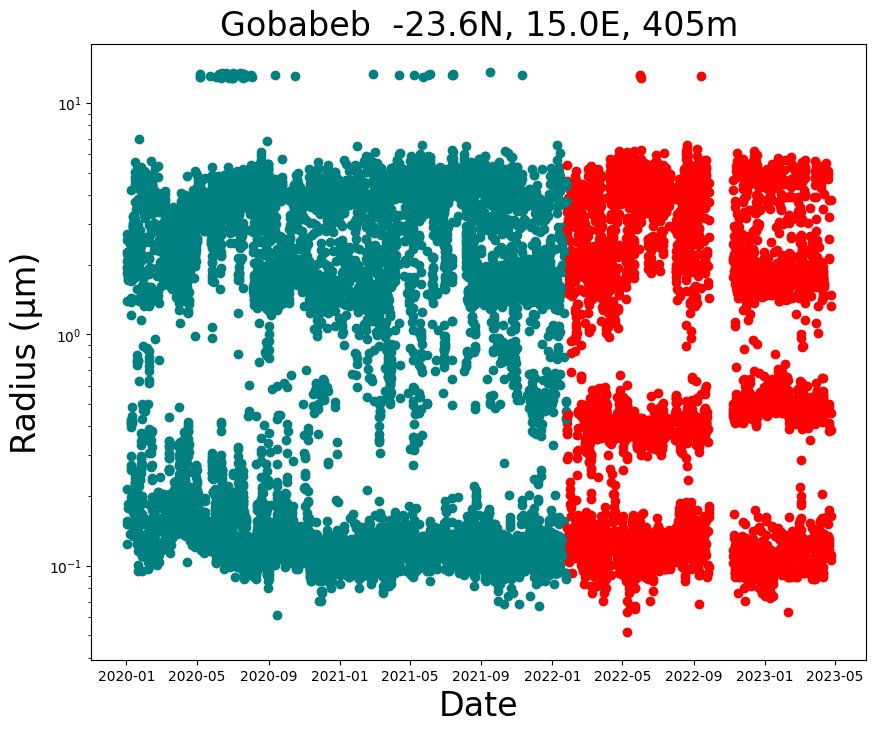

In [ ]:
cutoff_date = pd.to_datetime('25:01:2022', format='%d:%m:%Y')

# Plot the highest peaks as a function of the date and time
plt.figure(figsize=(10, 8))
for peak in peak_df['Radius'].unique():
    subset = peak_df[peak_df['Radius'] == peak]
    before_cutoff = subset[subset['Datetime'] < cutoff_date]
    after_cutoff = subset[subset['Datetime'] >= cutoff_date]
    plt.scatter(before_cutoff['Datetime'], before_cutoff['Radius'], color='teal', label=f'Radius: {peak:.2f} µm (Before Jan 25, 2022)')
    plt.scatter(after_cutoff['Datetime'], after_cutoff['Radius'], color='red', label=f'Radius: {peak:.2f} µm (After Jan 25, 2022)')

plt.xlabel('Date', fontsize=24)
plt.ylabel('Radius (µm)', fontsize=24)
plt.yscale('log')
plt.title(site + '  ' + str(round(lat,1)) + 'N, '  + str(round(lon, 1)) + 'E, ' + str(int(elevation)) + 'm', fontsize=24)
#plt.legend()
#plt.grid(True)
#plt.tight_layout()

plt.show()



In [ ]:
pd.set_option('display.max_columns', None)
df.head(100)

,Site,Date(dd:mm:yyyy),Time(hh:mm:ss),Day_of_Year,Day_of_Year(Fraction),0.050000,0.065604,0.086077,0.112939,0.148184,0.194429,0.255105,0.334716,0.439173,0.576227,0.756052,0.991996,1.301571,1.707757,2.240702,2.939966,3.857452,5.061260,6.640745,8.713145,11.432287,15.000000,Inflection_Radius_of_Size_Distribution(um),Average_Solar_Zenith_Angles_for_Flux_Calculation(Degrees),Solar_Zenith_Angle_for_Measurement_Start(Degrees),Sky_Residual(%),Sun_Residual(%),Coincident_AOD440nm,Scattering_Angle_Bin_3.2_to_<6_degrees[440nm],Scattering_Angle_Bin_6_to_<30_degrees[440nm],Scattering_Angle_Bin_30_to_<80_degrees[440nm],Scattering_Angle_Bin_80_degrees_and_over[440nm],Scattering_Angle_Bin_3.2_to_<6_degrees[675nm],Scattering_Angle_Bin_6_to_<30_degrees[675nm],Scattering_Angle_Bin_30_to_<80_degrees[675nm],Scattering_Angle_Bin_80_degrees_and_over[675nm],Scattering_Angle_Bin_3.2_to_<6_degrees[870nm],Scattering_Angle_Bin_6_to_<30_degrees[870nm],Scattering_Angle_Bin_30_to_<80_degrees[870nm],Scattering_Angle_Bin_80_degrees_and_over[870nm],Scattering_Angle_Bin_3.2_to_<6_degrees[1020nm],Scattering_Angle_Bin_6_to_<30_degrees[1020nm],Scattering_Angle_Bin_30_to_<80_degrees[1020nm],Scattering_Angle_Bin_80_degrees_and_over[1020nm],Surface_Albedo[440m],Surface_Albedo[675m],Surface_Albedo[870m],Surface_Albedo[1020m],If_Retrieval_is_L2(without_L2_0.4_AOD_440_threshold),If_AOD_is_L2,Last_Processing_Date(dd:mm:yyyy),Last_Processing_Time(hh:mm:ss),Instrument_Number,Latitude(Degrees),Longitude(Degrees),Elevation(m),Inversion_Data_Quality_Level,Retrieval_Measurement_Scan_Type
0,Gobabeb,01:01:2020,14:15:18,1,1.593958,0.000091,0.000270,0.000646,0.001242,0.001910,0.002394,0.002637,0.002947,0.003771,0.005407,0.007676,0.009959,0.011875,0.013243,0.013546,0.012098,0.008987,0.005442,0.002694,0.001094,0.000364,0.000099,0.439,44.563222,43.885553,4.086183,1.223584,0.057607,4,10,8,3,4,10,8,3,4,10,8,3,4,10,8,3,0.13444,0.30439,0.36458,0.38306,0,1,07:06:2021,22:31:16,1123,-23.561619,15.041058,405.0,lev15,Almucantar
1,Gobabeb,01:01:2020,15:12:01,1,1.633345,0.000153,0.000383,0.000776,0.001283,0.001769,0.002135,0.002448,0.002929,0.003838,0.005340,0.007336,0.009538,0.011788,0.013837,0.014786,0.013479,0.009995,0.005988,0.002961,0.001238,0.000443,0.000137,0.439,57.294413,56.625397,5.824366,0.976050,0.062113,4,10,7,5,4,10,7,5,4,10,7,4,4,10,8,3,0.14113,0.32015,0.38276,0.40055,0,1,07:06:2021,22:34:32,1123,-23.561619,15.041058,405.0,lev15,Almucantar
2,Gobabeb,01:01:2020,15:38:54,1,1.652014,0.000163,0.000470,0.000998,0.001583,0.001960,0.002076,0.002162,0.002527,0.003451,0.005138,0.007598,0.010494,0.013161,0.014857,0.014823,0.012671,0.009095,0.005501,0.002842,0.001260,0.000477,0.000154,0.439,63.262752,62.599279,9.138975,0.837556,0.064481,3,10,8,5,3,10,8,5,3,10,8,4,3,10,8,4,0.14586,0.33130,0.39560,0.41289,0,1,07:06:2021,22:37:36,1123,-23.561619,15.041058,405.0,lev15,Almucantar
3,Gobabeb,01:01:2020,16:19:01,1,1.679873,0.000129,0.000420,0.000990,0.001706,0.002235,0.002407,0.002416,0.002610,0.003341,0.005040,0.008008,0.011632,0.014560,0.015957,0.015569,0.013335,0.009705,0.005886,0.002968,0.001244,0.000432,0.000123,0.439,72.061350,71.408593,11.668351,0.562868,0.068894,4,10,6,5,4,10,6,4,4,10,6,2,4,10,4,3,0.15589,0.35497,0.42285,0.43910,0,1,07:06:2021,22:39:00,1123,-23.561619,15.041058,405.0,lev15,Almucantar
4,Gobabeb,01:01:2020,16:40:01,1,1.694456,0.000138,0.000540,0.001373,0.002305,0.002709,0.002499,0.002154,0.002105,0.002694,0.004623,0.009150,0.015944,0.020073,0.018996,0.015339,0.010999,0.006909,0.003786,0.001839,0.000804,0.000319,0.000115,0.439,76.601282,75.956141,15.207028,0.439299,0.070287,4,10,5,5,4,10,6,3,4,10,5,2,4,10,2,3,0.16333,0.37252,0.44298,0.45842,0,1,07:06:2021,22:40:31,1123,-23.561619,15.041058,405.0,lev15,Almucantar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Gobabeb,20:

In [ ]:
#Make the plot

plt.scatter(df['datetime_new']), df['Radius in (µm)']

KeyError: 'datetime_new'

In [ ]:
plt.xlabel('Datetime_new', fontsize=24)
plt.ylabel('Radius in (µm)', fontsize=24)
plt.yscale('log')
#plt.title(site + '  ' + str(round(lat,1)) + 'N, '  + str(round(lon, 1)) + 'E, ' + str(int(elevation)) + 'm', fontsize=24)
plt.legend()
#plt.grid(True)
plt.tight_layout()

plt.show()